In [4]:
from torchvision import models
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [5]:
resnet = models.resnet101(pretrained=True)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

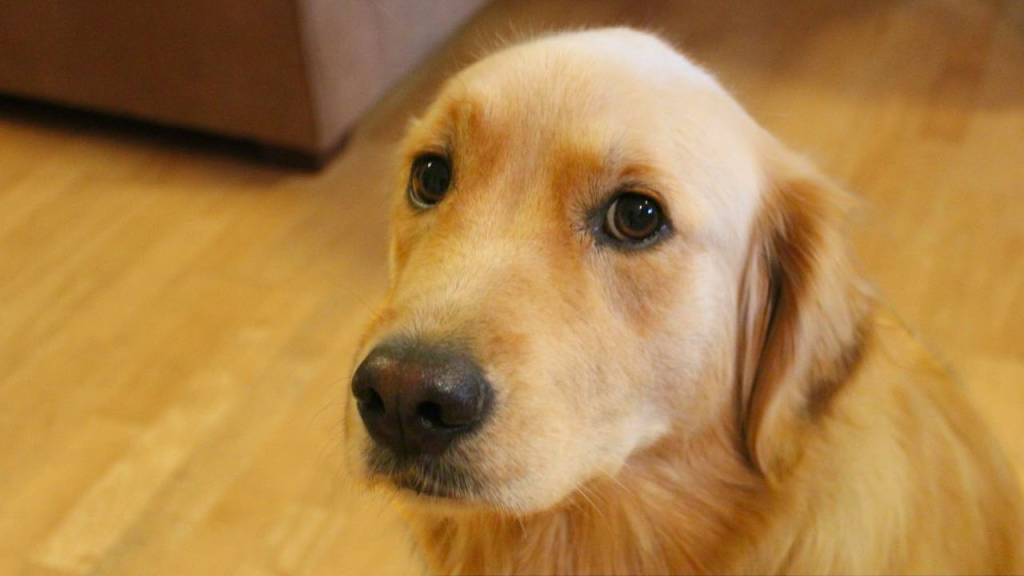

In [7]:
from PIL import Image
img = Image.open("dog.png")
img

In [8]:
img_t = preprocess(img)

In [9]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[-3.4555e+00, -1.6642e+00, -2.4643e+00, -3.2401e+00, -3.2361e+00,
         -1.3630e+00, -2.0326e+00, -2.5493e+00, -1.3136e+00, -2.9363e+00,
         -1.6862e+00, -1.3591e+00, -2.6530e+00, -2.9708e+00, -2.4566e+00,
         -2.8114e+00, -3.3225e+00, -8.0489e-01, -6.7122e-01, -1.2012e+00,
         -3.0428e+00, -3.9643e+00, -2.3467e+00, -1.1512e+00, -1.0782e+00,
         -1.0329e+00, -3.0816e+00, -2.4265e+00, -2.1599e+00, -3.1873e+00,
         -3.3087e+00, -1.8727e+00, -2.0737e+00, -2.1116e+00, -1.8539e+00,
         -3.2169e+00, -1.0980e+00, -1.0851e+00, -1.2579e+00, -9.7403e-01,
         -5.0676e-01, -1.5474e+00,  1.4485e+00,  1.2920e-01, -1.8703e+00,
         -1.5046e+00,  9.2930e-01, -1.0110e+00, -3.0195e+00, -2.7705e+00,
         -2.6268e+00, -2.0690e+00, -1.8251e+00, -1.9803e+00, -1.7778e+00,
         -1.4042e+00, -5.2112e-01, -2.0288e+00, -3.3248e+00, -5.5067e-01,
         -4.0346e-01, -1.1923e+00, -8.4867e-01, -1.4465e+00, -1.5197e+00,
         -2.1524e+00, -1.7439e+00, -4.

In [11]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('207, golden_retriever', 96.365966796875)

tensor([[[-0.6281, -0.6623, -0.6794,  ...,  0.0056, -0.0287, -0.0629],
         [-0.7137, -0.7137, -0.7137,  ...,  0.0227,  0.0227,  0.0056],
         [-0.7137, -0.7137, -0.7137,  ...,  0.0398,  0.0569,  0.0569],
         ...,
         [ 1.4440,  1.4440,  1.4783,  ...,  0.6049,  0.6392,  0.6734],
         [ 1.4269,  1.4440,  1.4783,  ...,  0.6734,  0.6734,  0.7077],
         [ 1.4612,  1.4783,  1.5125,  ...,  0.6906,  0.7248,  0.7419]],

        [[-1.2829, -1.2829, -1.2829,  ..., -0.6527, -0.6702, -0.7052],
         [-1.2654, -1.2479, -1.2654,  ..., -0.6176, -0.6527, -0.6877],
         [-1.2479, -1.2479, -1.2654,  ..., -0.6176, -0.6176, -0.6352],
         ...,
         [ 0.7829,  0.8004,  0.8704,  ..., -0.3025, -0.2675, -0.2150],
         [ 0.7654,  0.8354,  0.9055,  ..., -0.2150, -0.2150, -0.1625],
         [ 0.8004,  0.8529,  0.9230,  ..., -0.1800, -0.1275, -0.0574]],

        [[-1.4907, -1.4559, -1.4210,  ..., -1.0376, -1.0898, -1.1421],
         [-1.5081, -1.4733, -1.4210,  ..., -1